In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns;

In [2]:
folder = input("Please give the folder path containing your hpxmp and openmp data:")
bench_name = input("Enter your bench name:")
merged_hpxmp = open(folder+"/merged_hpxmp.csv","w+")
for line in open(folder+"/hpxmp_"+bench_name+"_2th_run.csv"):
    merged_hpxmp.write(line)
for num in range(3,12):
    f = open(folder+"/hpxmp_"+bench_name+"_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_hpxmp.write(line)
    f.close()
merged_hpxmp.close()

merged_openmp = open(folder+"/merged_openmp.csv","w+")    
for line in open(folder+"/openmp_"+bench_name+"_2th_run.csv"):
    merged_openmp.write(line)
for num in range(3,12):
    f = open(folder+"/openmp_"+bench_name+"_"+str(num)+"th_run.csv")
    f.__next__() #skip the header
    for line in f:
        merged_openmp.write(line)
    f.close()
merged_openmp.close()
                 

Please give the folder path containing your hpxmp and openmp data:../result_dense_vector_marv_noht_201811211634
Enter your bench name:dense_vector


In [24]:
hpxmp = pd.read_csv(folder+"/merged_hpxmp.csv")
openmp = pd.read_csv(folder+"/merged_openmp.csv")
hpxmp.head()
openmp.head(20)

,num_threads,vector_size,mfc/s,counter
0,1,1000000,39.7425,
1,2,1000000,68.2082,
2,3,1000000,88.3236,
3,4,1000000,104.6460,
4,5,1000000,120.3220,
5,6,1000000,130.2250,
6,7,1000000,135.1530,
7,8,1000000,149.3430,
8,9,1000000,152.5090,
9,10,1000000,152.5090,


In [27]:
hpxmp_1_2 = hpxmp.groupby(['num_threads','vector_size']).mean()
hpxmp_1_2.head()
openmp_1_2 = openmp.groupby(['num_threads','vector_size']).mean()

In [28]:
hpxmp_1_2 = hpxmp_1_2.reset_index()
hpxmp_1_2.head()
openmp_1_2 = openmp_1_2.reset_index()

In [29]:
pivot_table_hpxmp = hpxmp_1_2.pivot('vector_size','num_threads','mfc/s')

In [30]:
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')

how many distinct thread do you have?16
how many vector size group do you have?10


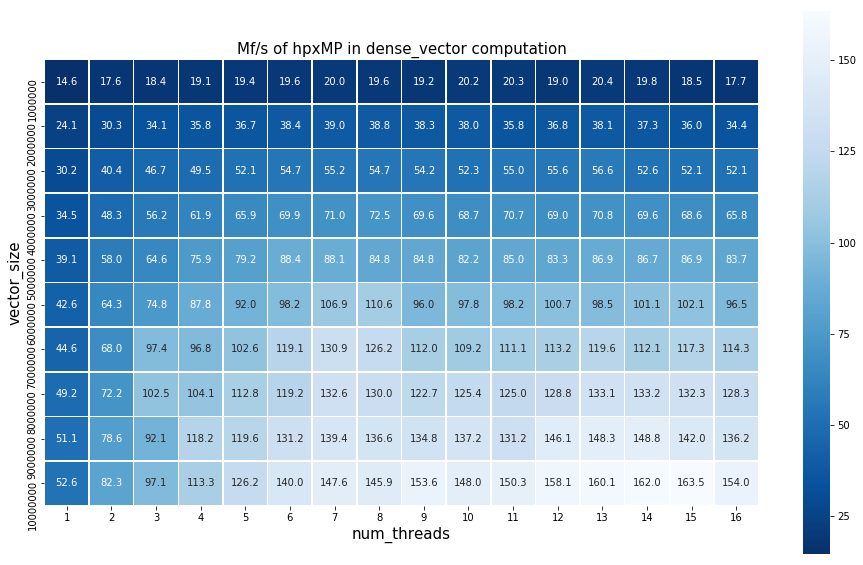

In [31]:
num_thr=int(input("how many distinct thread do you have?"))
num_vsz=int(input("how many vector size group do you have?"))
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of hpxMP in '+bench_name+' computation',size = 15)
sns_plot_hpxmp = sns.heatmap(pivot_table_hpxmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')


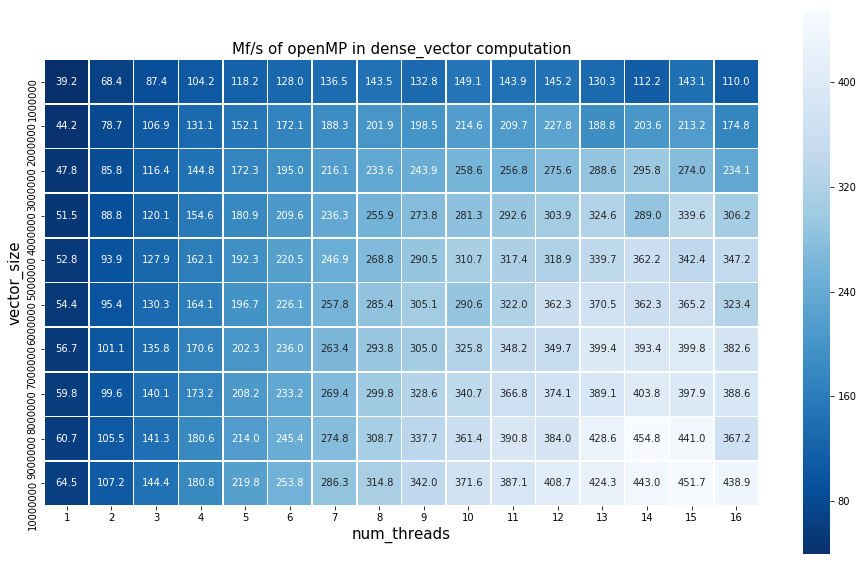

In [32]:
plt.figure(figsize=(num_thr,num_vsz))
pivot_table_openmp = openmp_1_2.pivot('vector_size','num_threads','mfc/s')
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('Mf/s of openMP in '+bench_name+' computation',size = 15)
sns_plot_openmp = sns.heatmap(pivot_table_openmp,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [33]:
figure_hpxmp = sns_plot_hpxmp.get_figure()
figure_hpxmp.savefig(folder+"/hpxmp")
figure_openmp = sns_plot_openmp.get_figure()
figure_openmp.savefig(folder+"/openmp")

In [34]:
pivot_table_diff = pivot_table_hpxmp/pivot_table_openmp

In [35]:
pivot_table_diff.head(16)

num_threads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
vector_size,,,,,,,,,,,,,,,,
1000000,0.373615,0.256970,0.210887,0.183210,0.164003,0.152740,0.146751,0.136705,0.144912,0.135200,0.141241,0.131111,0.156237,0.176642,0.129382,0.160724
2000000,0.545389,0.384535,0.319390,0.272940,0.241340,0.223218,0.206991,0.192352,0.192935,0.177185,0.170722,0.161650,0.201810,0.183225,0.168804,0.197064
3000000,0.631530,0.470282,0.401444,0.341958,0.302374,0.280239,0.255560,0.234047,0.222223,0.202385,0.214047,0.201636,0.196008,0.177862,0.190041,0.222721
4000000,0.671113,0.544350,0.467711,0.400406,0.364228,0.333291,0.300469,0.283405,0.254230,0.244259,0.241770,0.227151,0.218008,0.240777,0.202037,0.214943
5000000,0.741625,0.617178,0.504829,0.468272,0.412022,0.401092,0.356940,0.315277,0.291695,0.264692,0.267805,0.261325,0.255674,0.239327,0.253880,0.241001
6000000,0.783414,0.674162,0.574075,0.535332,0.467745,0.434294,0.414772,0.387473,0.314672,0.336602,0.304946,0.277862,0.265870,0.278962,0.279710,0.298488
7000000,0.787353,0.672713,0.717242,0.567710,0.506981,0.504701,0.496821,0.429461,0.367415,0.335031,0.319190,0.323732,0.299373,0.284893,0.293380,0.298838
8000000,0.822372,0.725045,0.731276,0.601177,0.541935,0.511388,0.492171,0.433706,0.373393,0.367997,0.340943,0.344316,0.342150,0.329938,0.332477,0.330074
9000000,0.841700,0.744513,0.651842,0.654324,0.558773,0.534682,0.507493,0.442379,0.399222,0.379571,0.335819,0.380535,0.346080,0.327146,0.322092,0.370940


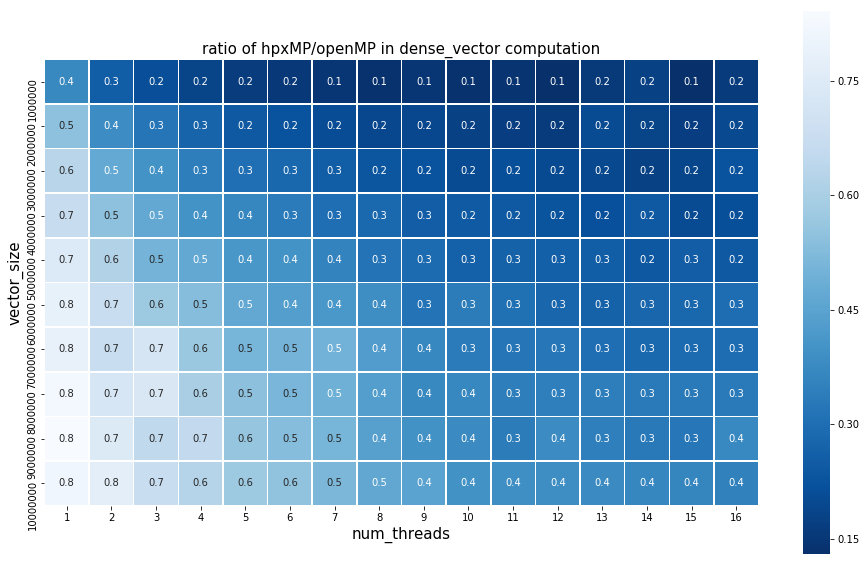

In [36]:
plt.figure(figsize=(num_thr,num_vsz))
plt.xlabel('num_threads', size = 15)
plt.ylabel('vector_size',size = 15)
plt.title('ratio of hpxMP/openMP in '+bench_name+' computation',size = 15)
sns_plot_diff = sns.heatmap(pivot_table_diff,annot=True, fmt=".1f",linewidths=.5, square=True,cmap='Blues_r')

In [19]:
figure_diff = sns_plot_diff.get_figure()
figure_diff.savefig(folder+"/hpxmp_openmp_diff")